# 3. Curve fitting with Levenberg-Marquardt


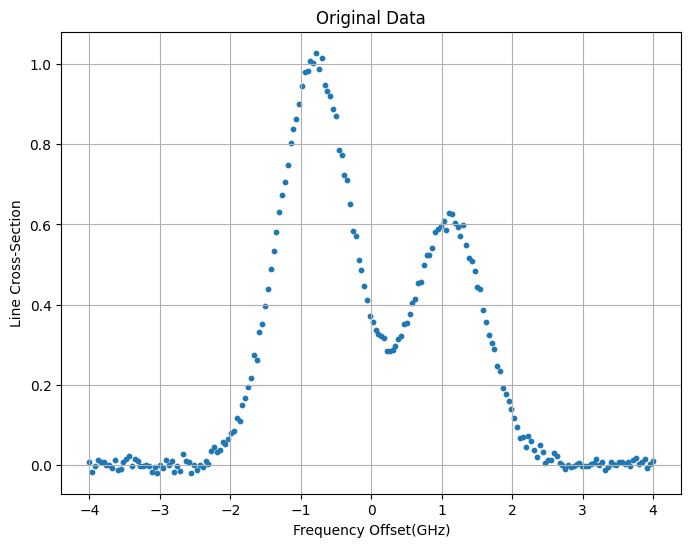

Fitted Parameters for Two 1D Gaussians:
Gaussian 1 Parameters:
Amplitude 1: 1.0011139082688358
Center 1 (Frequency Offset): -0.8006697074192017
Width 1 (Sigma): 0.5212199884513367
Gaussian 2 Parameters:
Amplitude 2: 0.61343962318129
Center 2 (Frequency Offset): 1.1006565375009572
Width 2 (Sigma): 0.5148002807621213
Ratio of amplitudes (A2/A1) 0.6127570680164388


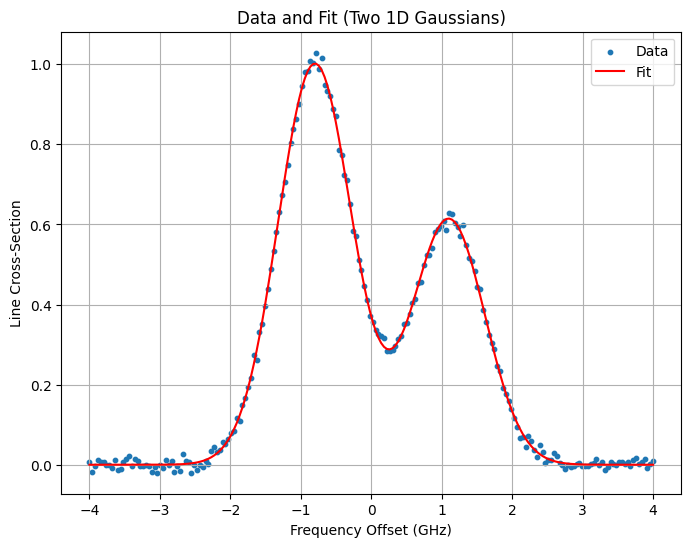

In [7]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Creating a function to read the data file and plot the initial data
def read_and_plot_data(filename):
    data = np.loadtxt(filename)
    frequency_offset, line_cross_section = data[:, 0], data[:, 1]

    # Plot the original data
    plt.figure(figsize=(8, 6))
    plt.scatter(frequency_offset, line_cross_section, s=10, label="Data")
    plt.xlabel("Frequency Offset(GHz)")
    plt.ylabel("Line Cross-Section")
    plt.title("Original Data")
    plt.grid(True)
    plt.show()

    return frequency_offset, line_cross_section

# Creating a function for the sum of two 1D-Gaussians
def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return A1 * np.exp(-(x - mu1) ** 2 / (2 * sigma1 ** 2)) + A2 * np.exp(-(x - mu2) ** 2 / (2 * sigma2 ** 2))

# Creating a function to fit the data with the sum of two 1D Gaussians
def fit_data_with_double_gaussian(x, y):
    # Initial parameter guess
    initial_guess = [max(y), x[np.argmax(y)], 1.0, max(y), x[np.argmax(y)] + 2, 1.0]

    # Performing curve fitting using curve_fit
    params, _ = curve_fit(double_gaussian, x, y, p0=initial_guess)

    return params
# Question 3(a): Load and plot the original data
filename = "nad2.dat"
frequency_offset, line_cross_section = read_and_plot_data(filename)

# Question 3(b): Fit the data with the sum of two 1D Gaussians
params = fit_data_with_double_gaussian(frequency_offset, line_cross_section)
A1, mu1, sigma1, A2, mu2, sigma2 = params

# Printing the fitted parameters and amplitude ratio
print("Fitted Parameters for Two 1D Gaussians:")
print("Gaussian 1 Parameters:")
print("Amplitude 1:", A1)
print("Center 1 (Frequency Offset):", mu1)
print("Width 1 (Sigma):", sigma1)
print("Gaussian 2 Parameters:")
print("Amplitude 2:", A2)
print("Center 2 (Frequency Offset):", mu2)
print("Width 2 (Sigma):", sigma2)
print("Ratio of amplitudes (A2/A1)", A2/A1)

# 3(c): Plotting the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(frequency_offset, line_cross_section, s=10, label="Data")
plt.plot(frequency_offset, double_gaussian(frequency_offset, *params), 'r', label="Fit")
plt.xlabel("Frequency Offset (GHz)")
plt.ylabel("Line Cross-Section")
plt.title("Data and Fit (Two 1D Gaussians)")
plt.legend()
plt.grid(True)
plt.show()

# Explaination

**1. Original Data Plot:**
   - The code begins by reading the "nad2.dat" file, which contains experimental data for the Sodium atom D2 line cross-section vs. frequency offset.
   - After loading the data, it creates a plot to visualize the original dataset.
   - The x-axis represents the frequency offset, and the y-axis represents the line cross-section.
   - Each data point is displayed as a scatter plot marker, creating a cloud of points on the graph.

**2. Fitted Parameters:**
   - Following the data plot, the code proceeds to fit the data using a double Gaussian function. This involves finding the best-fitting parameters for the double Gaussian model that describes the observed behavior.
   - The fitted parameters are calculated and stored in variables:
     - `A1` represents the Amplitude of the first Gaussian peak.
     - `mu1` represents the Center (Frequency Offset) of the first Gaussian peak.
     - `A2` represents the Amplitude of the second Gaussian peak.
     - `mu2` represents the Center (Frequency Offset) of the second Gaussian peak.
     - `sigma` represents the Common Width (Sigma) of both Gaussians.
   - These parameters provide insights into the characteristics of the double Gaussian model that fits the data.

**3. Data and Fit Plot:**
   - To visually assess the quality of the fit, the code generates another plot that superimposes the original data points and the fitted double Gaussian function.
   - The original data points are displayed as scattered markers on the graph, representing the experimental measurements.
   - The fitted double Gaussian curve is shown in red, illustrating how well it matches the data.
   - By comparing the data points to the fitted curve, viewers can observe how closely the double Gaussian function aligns with the actual measurements.

